<a href="https://colab.research.google.com/github/IA-DAMA/ML_ClassificationModels/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Required libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

**Dataset repository**

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

1.   We can see how can you set labels much simplier
2.   We'll be dropping some labels (Date, Holiday, Seasons)






In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functioning_day"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

1.   Turning Yes/No into 1 and 0
2.   Where hour is equal 12
3.   Dropping "hour" out




In [3]:
df.columns = dataset_cols
df["functioning_day"] = (df["functioning_day"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)
#The function above determines functioning-day value "Yes" or "No" in 1 and 0

In [4]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


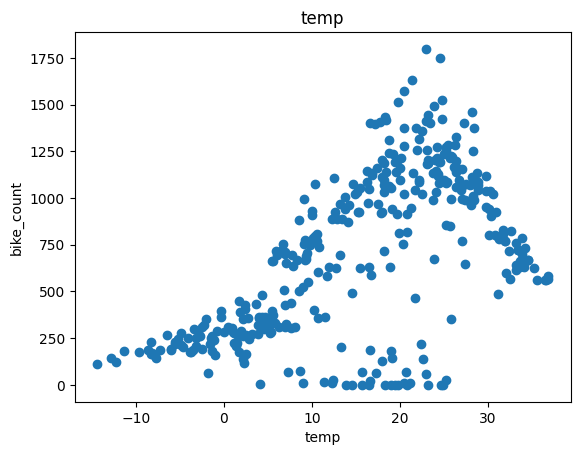

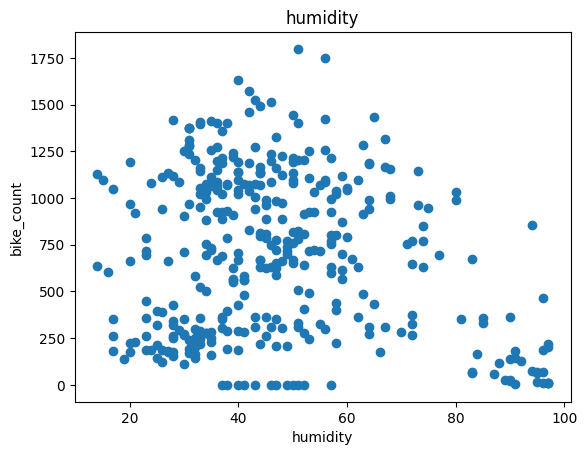

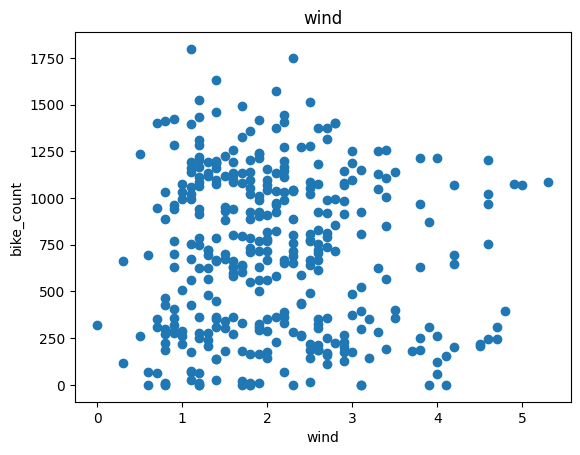

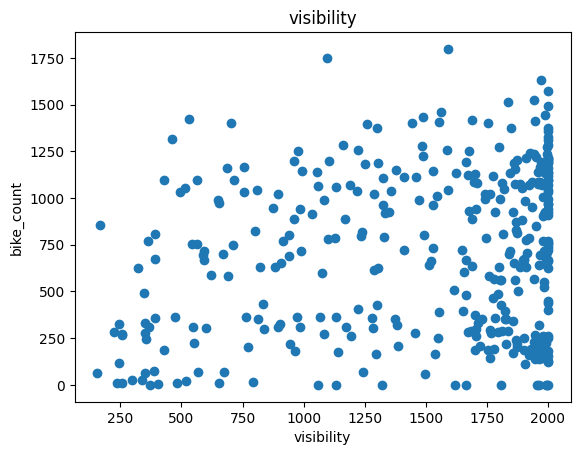

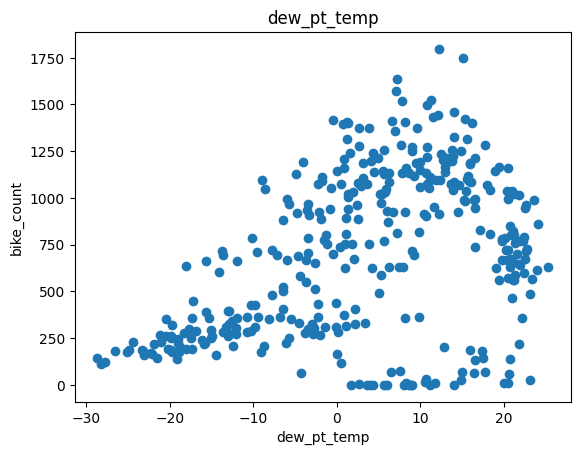

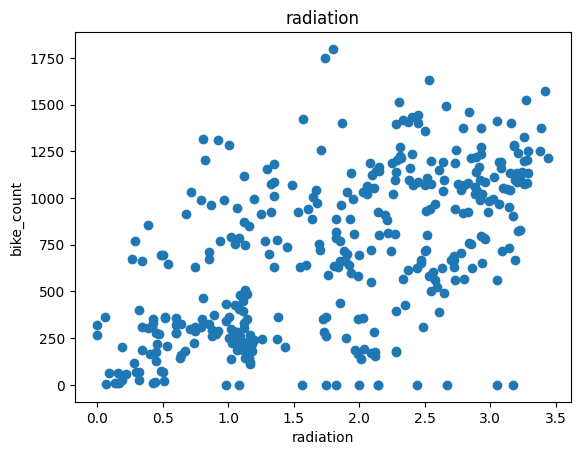

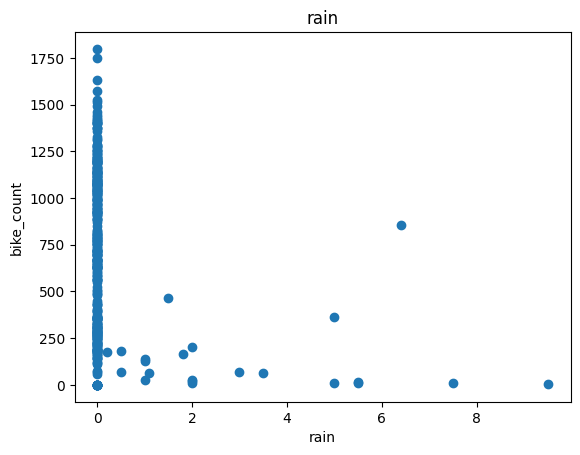

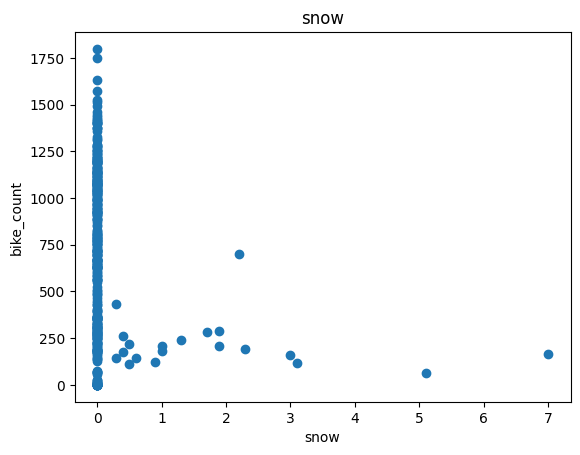

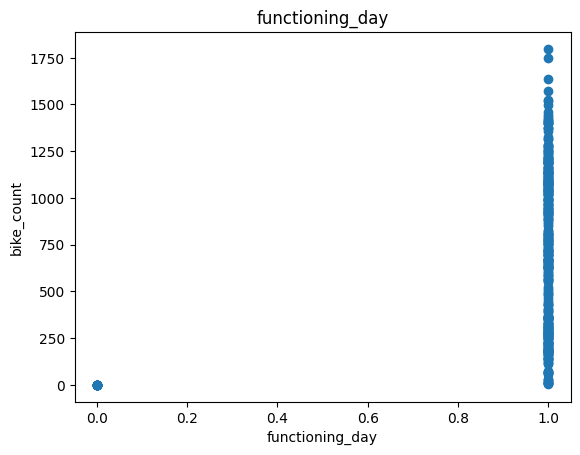

In [5]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike_count")
  plt.xlabel(label)
  plt.show()

**Treating dataset**

1.   Set cols
2.   Read cvs
3.   Drop cols



Droping out effective scatterd graphics

In [6]:
df = df.drop(["visibility", "wind", "functioning_day"], axis=1)

Heading without the droped labels/tables/cols/etc...

In [7]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train, valid, test dataset

**Creating splits**

In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

**Defining a function to get Xs and Ys**




In [9]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

*Temp = Temperature*

In [10]:
# Division of training
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])

# Division of validation
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])

# Division of tests
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])


In [11]:
#X_train_temp > It's the temperature

*Linear Regression*

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,  y_train_temp)

LinearRegression()

*Coeficient for temp and y_intercept*

In [13]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.39701809]] [378.89989348]


*R squared around .34 / Better than 0*

In [14]:
temp_reg.score(X_test_temp, y_test_temp)

0.24511664334181837

*Scatter, predict and plot X*

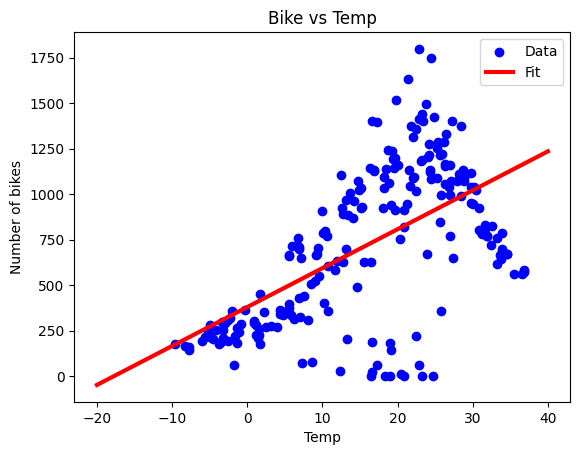

In [15]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [16]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [17]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:].tolist())
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:].tolist())
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:].tolist())

In [18]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

*Score reaching higher values*

In [19]:
all_reg.score(X_test_all, y_test_all)

0.5271434763223641

#Regression with Neural Net

*Ploting function*

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

*For normalization - Tensorflow*


In [21]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) #Creating Normalization
temp_normalizer.adapt(X_train_temp.reshape(-1)) #Adapting X_train and reshaping to a single vector

*Then the model*

In [22]:
temp_nn_model = tf.keras.Sequential([  #Adapting to training
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

*Let's compile*

In [23]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error") #MSE

*Calling history and fitting model*

In [24]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

*See values converging*
*Here using back_propagation to train a node*

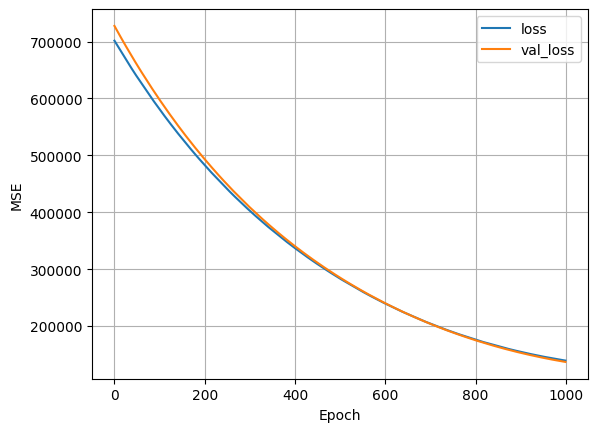

In [25]:
plot_loss(history)

*Running last plot (nn_model)*

4/4 [==============================] - 0s 2ms/step


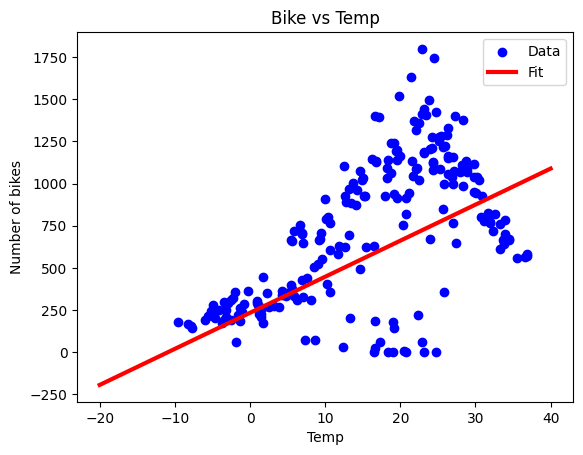

In [26]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3) # (nn) instead of (reg)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

*As we could see above, 2 different processes, 2 different ways to try to find the Best Linear Regression*

#R Neural Network

*Using real Neural Network instead of only 1 node for predictions*


*Defining model and compile*

In [27]:
#temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) #Creating Normalization
#temp_normalizer.adapt(X_train_temp.reshape(-1)) #Adapting X_train and reshaping to a single vector

nn_model = tf.keras.Sequential([  #Adapting to training
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), #By adding another layers, it came to worse for this model
    tf.keras.layers.Dense(1)

])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

*Training and validating*

In [28]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

*You may have to plot history by adding "Normalization" before the model set three cells above*

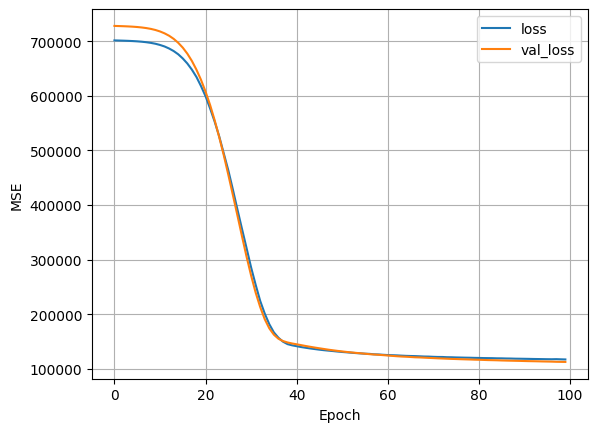

In [29]:
plot_loss(history)

*Ploting the model again - scattered*

4/4 [==============================] - 0s 2ms/step


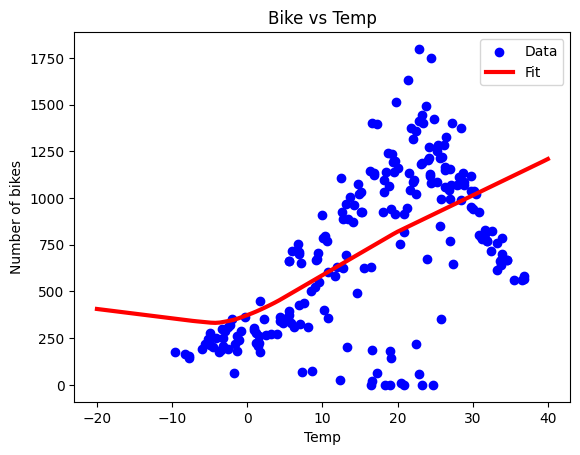

In [30]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3) # (nn) instead of (reg)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#R Neural Network

II - Trying again - "All" instead of \'Temp\'

In [31]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1) #Creating Normalization
all_normalizer.adapt(X_train_all) #Adapting X_train and reshaping to a single vector

In [32]:
nn_model = tf.keras.Sequential([  #Adapting to training
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
   #tf.keras.layers.Dense(32, activation='relu'), #By adding this another layers, it came to worse for this model
    tf.keras.layers.Dense(1)

])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [33]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

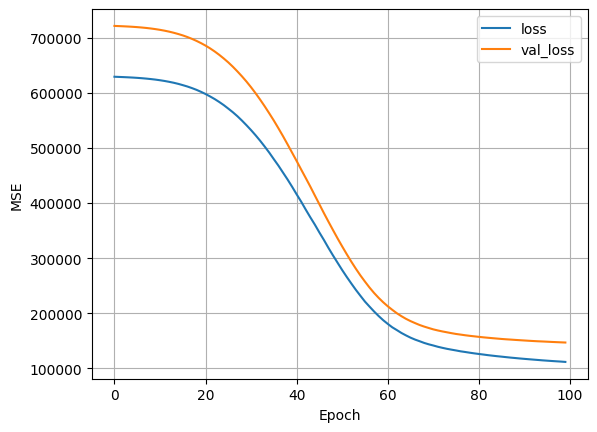

In [34]:
plot_loss(history)

*Calculating MSE for both Liner and NN*

In [35]:
y_pred_lr = all_reg.predict(X_test_all) #Our predictions - "all_reg.predict(X_test_all)""
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [36]:
def MSE(y_pred, y_real):
  return (np.square(y_pred -y_real)).mean()

In [37]:
MSE(y_pred_lr, y_test_all)

103226.50781265392

In [38]:
MSE(y_pred_nn, y_test_all)

144640.77330944923

*Ploting True values and Predicted values*

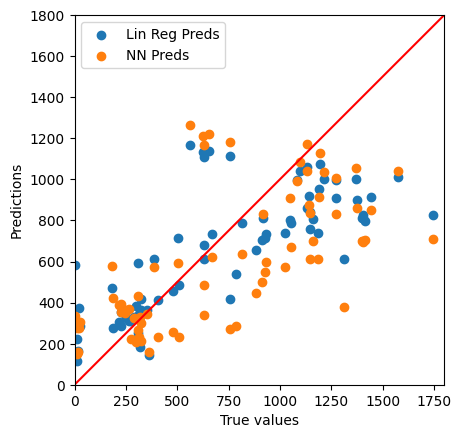

In [39]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")